In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_folder = 'Data files'
input_file = f'{data_folder}/P_value_2023-06-14_04-46-27_Value.csv'

df_V = pd.read_csv(input_file)
df_V

,Frame,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,...,Sensor_63,Sensor_64,Sensor_65,Sensor_66,Sensor_67,Sensor_68,Sensor_69,Sensor_70,Sensor_71,Sensor_72
0,0,141.104167,186.640000,178.179130,179.650000,164.411667,145.6752,133.844136,127.062857,148.933712,...,160.1360,153.8752,174.253561,214.740741,205.990769,189.2112,173.355556,152.4592,154.292308,150.9616
1,1,141.645833,186.265455,177.798261,179.603333,164.361667,145.7056,133.552469,127.058571,149.340909,...,160.2448,153.7712,174.098291,214.873219,205.829231,189.0608,173.017778,152.1776,154.587692,151.0944
2,2,141.537879,186.156364,178.401739,179.828333,164.488333,145.6032,133.669753,127.247143,149.386364,...,160.4720,153.8064,174.361823,215.014245,205.895385,189.5984,173.482963,152.3952,154.333846,151.1344
3,3,141.435606,186.258182,178.526957,179.776667,164.415000,145.7744,133.719136,127.414286,149.115530,...,160.3872,153.7840,174.118234,214.970085,205.823077,189.4816,173.602963,152.2992,154.484615,151.3232
4,4,141.437500,186.536364,178.500870,179.725000,164.331667,145.7088,133.862654,127.240000,149.308712,...,160.5248,153.7696,174.206553,214.877493,205.952308,189.5008,173.413333,152.3552,154.278462,151.3120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28350,28350,142.399621,184.983636,180.040000,181.845000,165.300000,146.1728,133.691358,127.360000,147.893939,...,160.6416,153.5072,173.705128,215.260684,206.558462,189.2288,173.820741,153.1216,154.423077,151.1344
28351,28351,142.617424,185.285455,179.850435,181.543333,165.435000,146.5520,133.930556,127.307143,148.339015,...,160.6720,153.6384,173.995726,215.384615,206.523077,189.2528,173.976296,152.9360,154.589231,151.5552
28352,28352,143.022727,185.549091,180.088696,181.713333,165.313333,146.5488,134.112654,127.160000,148.079545,...,160.8384,153.9824,173.745014,215.415954,206.607692,189.2672,173.832593,153.1216,154.893846,151.4608
28353,28353,143.064394,185.612727,180.020870,181.758333,165.668333,146.3632,134.064815,127.317143,147.924242,...,161.2224,154.1344,173.783476,215.403134,206.535385,189.3216,174.106667,152.8576,155.052308,151.4240


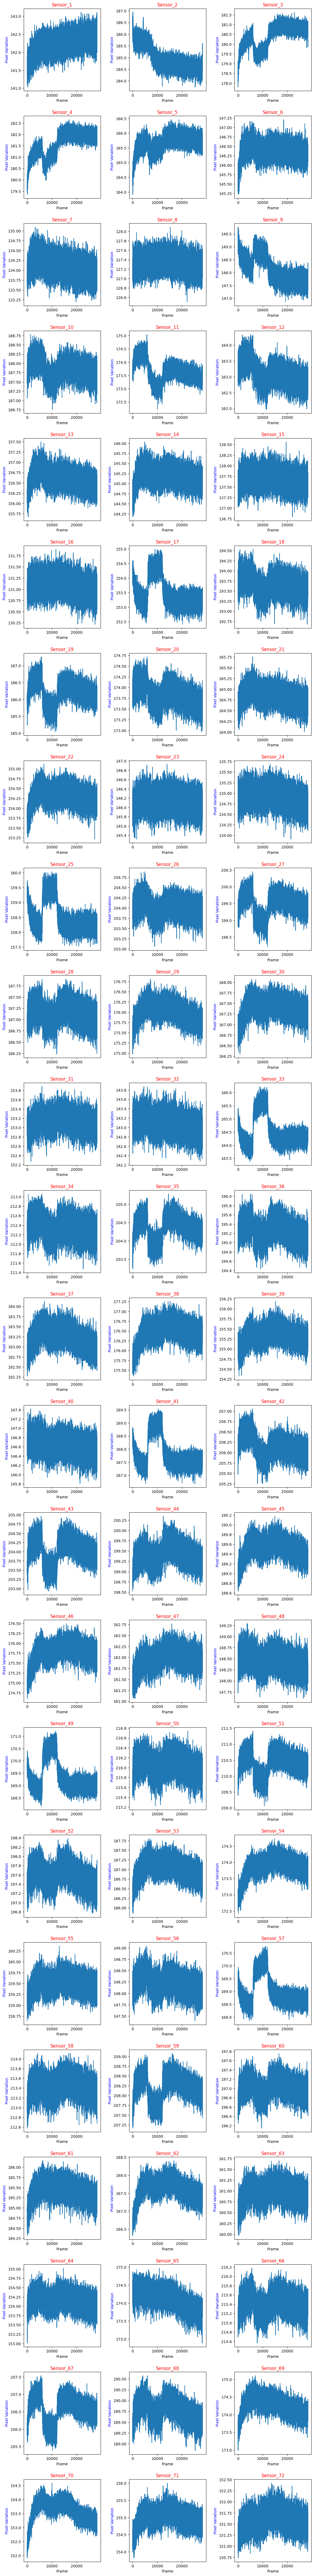

In [4]:
# Get the column names excluding the frame column
sensor_columns = df_V.columns[1:]

# Determine the number of subplots needed
num_subplots = len(sensor_columns)

# Set the layout of the subplots
subplot_rows = int((num_subplots + 2) / 3)  # Adjust the number of rows as needed
subplot_cols = min(3, num_subplots)  # Adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(12, 4 * subplot_rows))  # Adjust the figure size as needed

# Flatten the axes array if necessary
axes = axes.flatten()

# Plot the pixel variation for each sensor
for i, sensor in enumerate(sensor_columns):
    ax = axes[i] if num_subplots > 1 else axes
    ax.plot(df_V['Frame'], df_V[sensor])
    ax.set_title(sensor, color='red')
    ax.set_xlabel('Frame')
    ax.set_ylabel('Pixel Variation', color='blue')
    ax.margins(x=0.05)  # Add some margin to the x-axis

# Adjust the spacing between subplots
fig.tight_layout(pad=2.0)  # Increase the padding between subplots

# Show the plot
plt.show()

### \Delta%R : Variation of reflectivity

In [5]:
data_folder = 'Data files'
input_file = f'{data_folder}/Delta%R_V.csv'

df_standard = pd.read_csv(input_file)

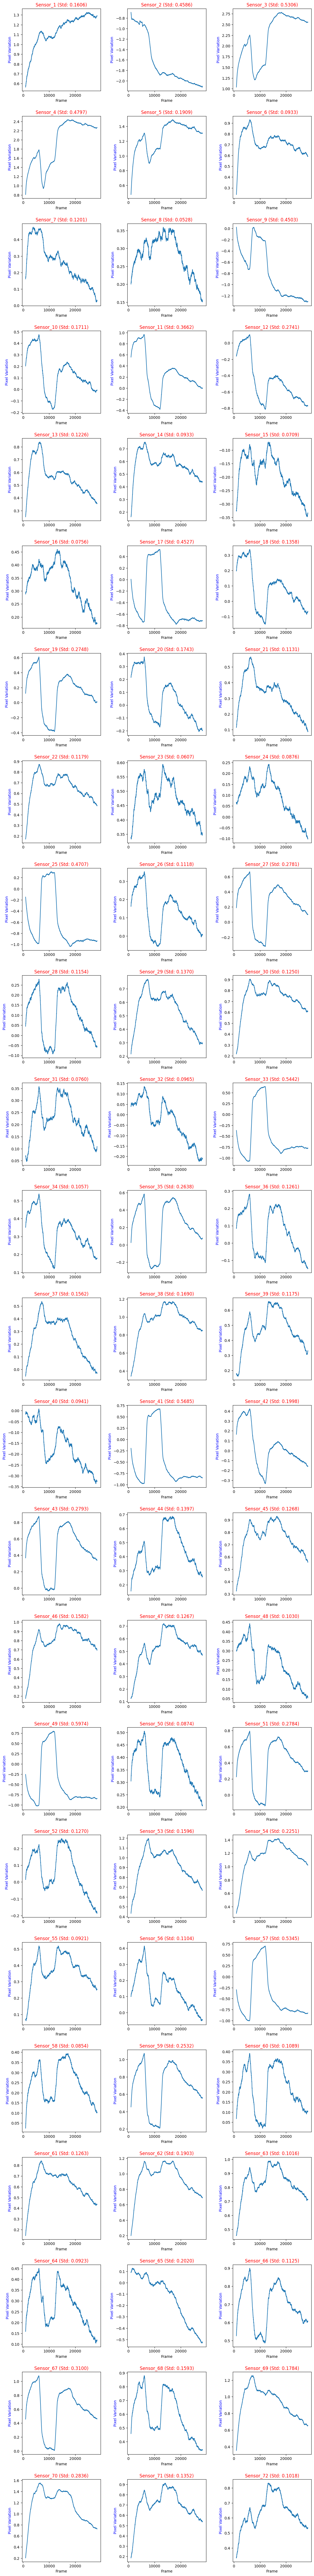

In [6]:
# Get the column names excluding the frame column
sensor_columns = df_standard.columns[1:]

# Determine the number of subplots needed
num_subplots = len(sensor_columns)

# Set the layout of the subplots
subplot_rows = int((num_subplots + 2) / 3)  # Adjust the number of rows as needed
subplot_cols = min(3, num_subplots)  # Adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(12, 4 * subplot_rows))  # Adjust the figure size as needed

# Flatten the axes array if necessary
axes = axes.flatten()

# Apply moving average and plot the smoothed data
window_size = 1000  # Adjust the window size as desired
for i, sensor in enumerate(sensor_columns):
    ax = axes[i] if num_subplots > 1 else axes
    smoothed_data = df_standard[sensor].rolling(window=window_size, min_periods=1).mean()
    ax.plot(df_standard['Frame'][window_size - 1:], smoothed_data[window_size - 1:])  # Exclude the first (window_size - 1) points
    std_value = np.std(df_standard[sensor].rolling(window=window_size, min_periods=1).mean().iloc[window_size - 1:].values)
    ax.set_title(f"{sensor} (Std: {std_value:.4f})", color='red')
    ax.set_xlabel('Frame')
    ax.set_ylabel('Pixel Variation', color='blue')
    ax.margins(x=0.05)  # Add some margin to the x-axis


# Adjust the spacing between subplots
fig.tight_layout(pad=2.0)  # Increase the padding between subplots

# Show the plot
plt.show()